# Representação de dados textuais


Fontes da aula de hoje:

* Documentação de algumas bibliotecas, e.g., ``nltk`` e ``scikit-learn``
* Referências disponíveis no AVA
* Considerações do professor
* ...

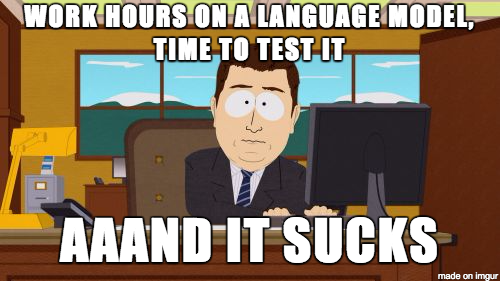

# Preliminares

## Tipos de dados

Boa parte dos algoritmos que veremos e/ou discutiremos assumem que a entrada será formada por atributos numéricos.

Nem sempre nossos dados iniciais são matrizes (*Data Frames*) cujas colunas representam atributos numéricos. Exemplos:
* atributos categóricos
* textos

### Atributos categóricos

Transformar um atributo categórico em atributos numéricos é uma operação simples e **sem perda de informação**. Considere o exemplo abaixo para o atributo ``day``.

In [9]:
import pandas as pd
import seaborn as sns

In [10]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
day = pd.get_dummies(tips.day, prefix = 'day')
day.head()

,day_Thur,day_Fri,day_Sat,day_Sun
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [13]:
new_tips = pd.concat([tips, day], axis = 1).drop('day', axis = 1)
new_tips.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,False,False,False,True
1,10.34,1.66,Male,No,Dinner,3,False,False,False,True
2,21.01,3.50,Male,No,Dinner,3,False,False,False,True
3,23.68,3.31,Male,No,Dinner,2,False,False,False,True
4,24.59,3.61,Female,No,Dinner,4,False,False,False,True


### Como comparar dois textos?

**Texto 1** (https://en.wikipedia.org/wiki/Vim_(text_editor))

*Vim (/vɪm/;[5] a contraction of Vi IMproved) is a free and open-source, screen-based text editor program for Unix. It is an improved clone of Bill Joy's vi. Vim's author, Bram Moolenaar, derived Vim from a port of the Stevie editor for Amiga[6] and released a version to the public in 1991. Vim is designed for use both from a command-line interface and as a standalone application in a graphical user interface. Vim is released under the Vim license that includes some charityware clauses, encouraging users who enjoy the software to consider donating to children in Uganda.[4] The Vim license is compatible with the GNU General Public License through a special clause allowing distribution of modified copies under the GNU GPL version 2.0 or later.[4]*

**Texto 2** (https://en.wikipedia.org/wiki/Emacs)

*Emacs /ˈiːmæks/ or EMACS (Editor MACroS)[3][4][5] is a family of text editors that are characterized by their extensibility.[6] The manual for the most widely used variant,[7] GNU Emacs, describes it as "the extensible, customizable, self-documenting, real-time display editor".[8] Development of the first Emacs began in the mid-1970s, and work on its direct descendant, GNU Emacs, continues actively as of 2021.*

Podemos analisar/comparar textos de várias formas:
1. Palavras que estão presentes
2. Frequência das palavras presentes
3. Importância de cada palavra no texto (tópicos)
4. Ordem das palavras
5. Semântica das palavras
7. ...


Na aula de hoje, vamos discutir representações textuais que embasarão estratégias para 1, 2, 3 e 4 (parcialmente).

É importante para a aula de hoje que vocês tenham uma noção de como representar textos. No entanto, é mais importante ainda que vocês entendam que não há representação perfeita.

# Lidando com dados textuais

Para o restante dessa aula, vamos assumir que nosso objeto de interesse é uma coleção de documentos $D = \{d_1, d_2, \dots, d_n\}$.

Nosso objetivo é, ao final da aula, ter uma matriz $\mathbf{X}$, tal que:
* A $i$-ésima linha de $\mathbf{X}$ represente o documento $d_i$
* As colunas de $\mathbf{X}$ sejam atributos que descrevam "bem" cada documento


## Limpeza e pré-processamento

Antes de discutir algumas construções de $\mathbf{X}$, veremos algumas tarefas iniciais de limpeza e pré-processamento de textos.

**Essas tarefas não são simples, e a lista a seguir não é exaustiva**.
Para essa aula, estou seguindo algumas dicas de https://machinelearningmastery.com/clean-text-machine-learning-python/

É uma boa prática seguir, ao menos, os seguintes passos:
1. Dividir o texto em *tokens*
2. Converter o texto para letras minúsculas
3. Remover símbolos de pontuação de cada *token*
4. Converter caracteres especiais (passo discutível e necessidade deve ser analisada)
5. Remover *tokens* que não são palavras
6. Remover *tokens* que são *stop words*

Além disso, as seguintes operações podem ser úteis em algumas situações:
7. *stemming*
8. *lemmatization* (disponível em algumas bibliotecas, mas não vou falar sobre)


### Dividindo o texto em sentenças e palavras

In [14]:
import nltk
#nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/hygo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
from nltk import sent_tokenize, word_tokenize

In [16]:
text = """Vim (/vɪm/;[5] a contraction of Vi IMproved) is a free and open-source,
 screen-based text editor program for Unix. It is an improved clone of Bill Joy's vi.
  Vim's author, Bram Moolenaar, derived Vim from a port of the Stevie editor for
  Amiga[6] and released a version to the public in 1991. Vim is designed for use
  both from a command-line interface and as a standalone application in a graphical
  user interface. Vim is released under the Vim license that includes some
  charityware clauses, encouraging users who enjoy the software to consider
  donating to children in Uganda.[4] The Vim license is compatible with the GNU
  General Public License through a special clause allowing distribution of modified
  copies under the GNU GPL version 2.0 or later.[4]"""

In [17]:
sentences = sent_tokenize(text)

In [18]:
sentences

['Vim (/vɪm/;[5] a contraction of Vi IMproved) is a free and open-source,\n screen-based text editor program for Unix.',
 "It is an improved clone of Bill Joy's vi.",
 "Vim's author, Bram Moolenaar, derived Vim from a port of the Stevie editor for\n  Amiga[6] and released a version to the public in 1991.",
 'Vim is designed for use\n  both from a command-line interface and as a standalone application in a graphical\n  user interface.',
 'Vim is released under the Vim license that includes some\n  charityware clauses, encouraging users who enjoy the software to consider\n  donating to children in Uganda.',
 '[4] The Vim license is compatible with the GNU\n  General Public License through a special clause allowing distribution of modified\n  copies under the GNU GPL version 2.0 or later.',
 '[4]']

In [19]:
tokens = word_tokenize(text)

In [20]:
tokens

['Vim',
 '(',
 '/vɪm/',
 ';',
 '[',
 '5',
 ']',
 'a',
 'contraction',
 'of',
 'Vi',
 'IMproved',
 ')',
 'is',
 'a',
 'free',
 'and',
 'open-source',
 ',',
 'screen-based',
 'text',
 'editor',
 'program',
 'for',
 'Unix',
 '.',
 'It',
 'is',
 'an',
 'improved',
 'clone',
 'of',
 'Bill',
 'Joy',
 "'s",
 'vi',
 '.',
 'Vim',
 "'s",
 'author',
 ',',
 'Bram',
 'Moolenaar',
 ',',
 'derived',
 'Vim',
 'from',
 'a',
 'port',
 'of',
 'the',
 'Stevie',
 'editor',
 'for',
 'Amiga',
 '[',
 '6',
 ']',
 'and',
 'released',
 'a',
 'version',
 'to',
 'the',
 'public',
 'in',
 '1991',
 '.',
 'Vim',
 'is',
 'designed',
 'for',
 'use',
 'both',
 'from',
 'a',
 'command-line',
 'interface',
 'and',
 'as',
 'a',
 'standalone',
 'application',
 'in',
 'a',
 'graphical',
 'user',
 'interface',
 '.',
 'Vim',
 'is',
 'released',
 'under',
 'the',
 'Vim',
 'license',
 'that',
 'includes',
 'some',
 'charityware',
 'clauses',
 ',',
 'encouraging',
 'users',
 'who',
 'enjoy',
 'the',
 'software',
 'to',
 'consider

### Convertendo o texto para letras minúsculas

In [21]:
tokens = [w.lower() for w in tokens]
tokens

['vim',
 '(',
 '/vɪm/',
 ';',
 '[',
 '5',
 ']',
 'a',
 'contraction',
 'of',
 'vi',
 'improved',
 ')',
 'is',
 'a',
 'free',
 'and',
 'open-source',
 ',',
 'screen-based',
 'text',
 'editor',
 'program',
 'for',
 'unix',
 '.',
 'it',
 'is',
 'an',
 'improved',
 'clone',
 'of',
 'bill',
 'joy',
 "'s",
 'vi',
 '.',
 'vim',
 "'s",
 'author',
 ',',
 'bram',
 'moolenaar',
 ',',
 'derived',
 'vim',
 'from',
 'a',
 'port',
 'of',
 'the',
 'stevie',
 'editor',
 'for',
 'amiga',
 '[',
 '6',
 ']',
 'and',
 'released',
 'a',
 'version',
 'to',
 'the',
 'public',
 'in',
 '1991',
 '.',
 'vim',
 'is',
 'designed',
 'for',
 'use',
 'both',
 'from',
 'a',
 'command-line',
 'interface',
 'and',
 'as',
 'a',
 'standalone',
 'application',
 'in',
 'a',
 'graphical',
 'user',
 'interface',
 '.',
 'vim',
 'is',
 'released',
 'under',
 'the',
 'vim',
 'license',
 'that',
 'includes',
 'some',
 'charityware',
 'clauses',
 ',',
 'encouraging',
 'users',
 'who',
 'enjoy',
 'the',
 'software',
 'to',
 'consider

### Removendo símbolos de pontuação de cada *token*

In [22]:
import string
table = str.maketrans('', '', string.punctuation)
tokens = [w.translate(table) for w in tokens]
tokens

['vim',
 '',
 'vɪm',
 '',
 '',
 '5',
 '',
 'a',
 'contraction',
 'of',
 'vi',
 'improved',
 '',
 'is',
 'a',
 'free',
 'and',
 'opensource',
 '',
 'screenbased',
 'text',
 'editor',
 'program',
 'for',
 'unix',
 '',
 'it',
 'is',
 'an',
 'improved',
 'clone',
 'of',
 'bill',
 'joy',
 's',
 'vi',
 '',
 'vim',
 's',
 'author',
 '',
 'bram',
 'moolenaar',
 '',
 'derived',
 'vim',
 'from',
 'a',
 'port',
 'of',
 'the',
 'stevie',
 'editor',
 'for',
 'amiga',
 '',
 '6',
 '',
 'and',
 'released',
 'a',
 'version',
 'to',
 'the',
 'public',
 'in',
 '1991',
 '',
 'vim',
 'is',
 'designed',
 'for',
 'use',
 'both',
 'from',
 'a',
 'commandline',
 'interface',
 'and',
 'as',
 'a',
 'standalone',
 'application',
 'in',
 'a',
 'graphical',
 'user',
 'interface',
 '',
 'vim',
 'is',
 'released',
 'under',
 'the',
 'vim',
 'license',
 'that',
 'includes',
 'some',
 'charityware',
 'clauses',
 '',
 'encouraging',
 'users',
 'who',
 'enjoy',
 'the',
 'software',
 'to',
 'consider',
 'donating',
 'to',

### "Convertendo" caracteres especiais

In [23]:
!pip install unidecode

In [24]:
import unidecode

token = "čüçáàãêõôò"
print(unidecode.unidecode(token))

cucaaaeooo


In [25]:
tokens = [unidecode.unidecode(w).lower() for w in tokens]
#tokens = [unidecode.unidecode(w) for w in tokens]
tokens

['vim',
 '',
 'vim',
 '',
 '',
 '5',
 '',
 'a',
 'contraction',
 'of',
 'vi',
 'improved',
 '',
 'is',
 'a',
 'free',
 'and',
 'opensource',
 '',
 'screenbased',
 'text',
 'editor',
 'program',
 'for',
 'unix',
 '',
 'it',
 'is',
 'an',
 'improved',
 'clone',
 'of',
 'bill',
 'joy',
 's',
 'vi',
 '',
 'vim',
 's',
 'author',
 '',
 'bram',
 'moolenaar',
 '',
 'derived',
 'vim',
 'from',
 'a',
 'port',
 'of',
 'the',
 'stevie',
 'editor',
 'for',
 'amiga',
 '',
 '6',
 '',
 'and',
 'released',
 'a',
 'version',
 'to',
 'the',
 'public',
 'in',
 '1991',
 '',
 'vim',
 'is',
 'designed',
 'for',
 'use',
 'both',
 'from',
 'a',
 'commandline',
 'interface',
 'and',
 'as',
 'a',
 'standalone',
 'application',
 'in',
 'a',
 'graphical',
 'user',
 'interface',
 '',
 'vim',
 'is',
 'released',
 'under',
 'the',
 'vim',
 'license',
 'that',
 'includes',
 'some',
 'charityware',
 'clauses',
 '',
 'encouraging',
 'users',
 'who',
 'enjoy',
 'the',
 'software',
 'to',
 'consider',
 'donating',
 'to',

### Removendo *tokens* que não são palavras

Você pode utilizar expressões regulares ou outro método mais sofisticado para manter outros *tokens* de interesse.

In [26]:
words = [word for word in tokens if word.isalpha()]

In [27]:
words

['vim',
 'vim',
 'a',
 'contraction',
 'of',
 'vi',
 'improved',
 'is',
 'a',
 'free',
 'and',
 'opensource',
 'screenbased',
 'text',
 'editor',
 'program',
 'for',
 'unix',
 'it',
 'is',
 'an',
 'improved',
 'clone',
 'of',
 'bill',
 'joy',
 's',
 'vi',
 'vim',
 's',
 'author',
 'bram',
 'moolenaar',
 'derived',
 'vim',
 'from',
 'a',
 'port',
 'of',
 'the',
 'stevie',
 'editor',
 'for',
 'amiga',
 'and',
 'released',
 'a',
 'version',
 'to',
 'the',
 'public',
 'in',
 'vim',
 'is',
 'designed',
 'for',
 'use',
 'both',
 'from',
 'a',
 'commandline',
 'interface',
 'and',
 'as',
 'a',
 'standalone',
 'application',
 'in',
 'a',
 'graphical',
 'user',
 'interface',
 'vim',
 'is',
 'released',
 'under',
 'the',
 'vim',
 'license',
 'that',
 'includes',
 'some',
 'charityware',
 'clauses',
 'encouraging',
 'users',
 'who',
 'enjoy',
 'the',
 'software',
 'to',
 'consider',
 'donating',
 'to',
 'children',
 'in',
 'uganda',
 'the',
 'vim',
 'license',
 'is',
 'compatible',
 'with',
 'the

### Removendo *stop words*

In [28]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/hygo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [30]:
words = [word for word in words if not word in stop_words]
words

['vim',
 'vim',
 'contraction',
 'vi',
 'improved',
 'free',
 'opensource',
 'screenbased',
 'text',
 'editor',
 'program',
 'unix',
 'improved',
 'clone',
 'bill',
 'joy',
 'vi',
 'vim',
 'author',
 'bram',
 'moolenaar',
 'derived',
 'vim',
 'port',
 'stevie',
 'editor',
 'amiga',
 'released',
 'version',
 'public',
 'vim',
 'designed',
 'use',
 'commandline',
 'interface',
 'standalone',
 'application',
 'graphical',
 'user',
 'interface',
 'vim',
 'released',
 'vim',
 'license',
 'includes',
 'charityware',
 'clauses',
 'encouraging',
 'users',
 'enjoy',
 'software',
 'consider',
 'donating',
 'children',
 'uganda',
 'vim',
 'license',
 'compatible',
 'gnu',
 'general',
 'public',
 'license',
 'special',
 'clause',
 'allowing',
 'distribution',
 'modified',
 'copies',
 'gnu',
 'gpl',
 'version',
 'later']

### *Stemming*

É o processo de reduzir palavras flexionadas/derivadas a uma base comum.

In [31]:
from nltk.stem.porter import PorterStemmer

In [32]:
porter = PorterStemmer()

In [33]:
porter.stem("improvement")

'improv'

In [34]:
porter.stem("improved")

'improv'

In [35]:
stemmed = [porter.stem(word) for word in words]

In [36]:
list(zip(words, stemmed))

[('vim', 'vim'),
 ('vim', 'vim'),
 ('contraction', 'contract'),
 ('vi', 'vi'),
 ('improved', 'improv'),
 ('free', 'free'),
 ('opensource', 'opensourc'),
 ('screenbased', 'screenbas'),
 ('text', 'text'),
 ('editor', 'editor'),
 ('program', 'program'),
 ('unix', 'unix'),
 ('improved', 'improv'),
 ('clone', 'clone'),
 ('bill', 'bill'),
 ('joy', 'joy'),
 ('vi', 'vi'),
 ('vim', 'vim'),
 ('author', 'author'),
 ('bram', 'bram'),
 ('moolenaar', 'moolenaar'),
 ('derived', 'deriv'),
 ('vim', 'vim'),
 ('port', 'port'),
 ('stevie', 'stevi'),
 ('editor', 'editor'),
 ('amiga', 'amiga'),
 ('released', 'releas'),
 ('version', 'version'),
 ('public', 'public'),
 ('vim', 'vim'),
 ('designed', 'design'),
 ('use', 'use'),
 ('commandline', 'commandlin'),
 ('interface', 'interfac'),
 ('standalone', 'standalon'),
 ('application', 'applic'),
 ('graphical', 'graphic'),
 ('user', 'user'),
 ('interface', 'interfac'),
 ('vim', 'vim'),
 ('released', 'releas'),
 ('vim', 'vim'),
 ('license', 'licens'),
 ('includes',

## Representação

Vamos assumir então que nosso conjunto $D = \{d_1, d_2, \dots, d_n\}$ seja o resultado obtido após a fase de pré-processamento.
Considere ainda que data $d_i$ é uma lista de **termos**.

Vamos assumir que $T = \{t_1, t_2, \dots, t_m\}$ é o conjunto de todos os termos únicos que aparecem em todos os documentos.

### Ideia 1: Matriz de contagem de termos

Nossa primeira estratégia será criar uma matriz $\mathbf{X}$, satisfazendo as seguinte propriedades:
* $\mathbf{X}$ tem $n$ linhas, uma para cada documento
* $\mathbf{X}$ tem $m$ colunas, uma para cada termo
* $x_{i,j}$ (elemento da linha $i$ e coluna $j$ de $\mathbf{X}$) representa o número de vezes que o termo $t_j$ aparece no documento $d_i$.

Para computar $\mathbf{X}$, vamos usar a classe ``CountVectorizer`` da biblioteca ``scikit-learn`` (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [38]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 21 stored elements and shape (4, 9)>

In [39]:
X.todense()

matrix([[0, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 2, 0, 1, 0, 1, 1, 0, 1],
        [1, 0, 0, 1, 1, 0, 1, 1, 1],
        [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [40]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [41]:
import pandas as pd
df = pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out())
df

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


A matriz de contagens é uma boa representação?

Definitivamente, ela captura algumas propriedades do conjunto de dados, mas nem todas.

Por exemplo, não captura a ideia de "tópicos". Em outras palavras, um termo que aparece frequentemente em poucos documentos deveria ser mais importante, para esses documentos, do que termos que aparecem frequentemente em muitos documentos.

### Ideia 2: Matriz de TF-IDF

Uma outra forma de representação textual é o TF-IDF (*Term Frequency - Inverse Document Frequency*).

Conceito originado no mundo de Recuperação da Informação.

Há varias "versões da definição". Um contexto mais geral em https://en.wikipedia.org/wiki/Tf%E2%80%93idf

A ideia é capturar a importância de um termo para um documento específico.

O TF-IDF é definido em função de:
1. TF (*Term Frequency*)
2. IDF (*Inverse Document Frequency*)

#### TF - *Term Frequency*

Dados um termo $t \in T$ e um documento $d \in D$,
$$\text{tf}(t, d) = \text{frequência de } t \text{ em } d.$$

PS: O TF pode ser medido em termos de contagem ou porcentagem.

#### IDF - *Inverse Document Frequency*

O IDF é o inverso da frequência do número de documentos que contém um dado termo. Assim,
$$\text{idf}(t, D) = \log\left(\frac{n}{|D_t|}\right),$$
onde:
* $n$ é o número de documentos em $D$
* $D_t$ é o conjunto de documentos que contém $t$, i.e., $D_t = \{d\in D|t\in d\}$.

#### Definição TF-IDF

Assim,
$$\text{tfidf}(t, d, D) = \text{tf}(t, d) \times \text{idf}(t, D).$$


Após computar os valores de TF-IDF para todos os termos e documentos, podemos definir a matriz $(i,j)$ da matriz $\mathbf{X}$ como sendo $\text{tfidf}(t_j, d_i, D)$.

#### Intuição TF-IDF

Dados um termo $t$, um documento $d$ e uma coleção de documentos $D$:
* se $\text{tf}(t, d)$ é alto, então $t$ é um termo frequente em $d$;
* se $\text{idf}(t, D)$ é alto, então $t$ aparece em poucos documentos de $D$.

Em outras palavras, o termo $t$ é uma **característica** (*feature*) importante para o documento $d$.

#### TF-IDF *vs.* TF

Qual a vantagem de multiplicar o TF pelo IDF? Por que não usar apenas o TF?

Considere o caso de **preposições**, ou *stop words*... Esses termos têm um TF elevado, uma vez que são conectivos comuns.
No entanto, esses termos são comuns em  **muitos** documentos, logo terão um IDF baixo.

Daí, vem a relevância do IDF.

#### Exemplo

In [42]:
d1 = pd.DataFrame(zip(["this", "is", "a", "sample"], [1, 1, 2, 1]), columns = ['term', 'frequency'])
d1

,term,frequency
0,this,1
1,is,1
2,a,2
3,sample,1


In [43]:
d2 = pd.DataFrame(zip(["this", "is", "another", "example"], [1, 1, 2, 3]), columns = ['term', 'frequency'])
d2

,term,frequency
0,this,1
1,is,1
2,another,2
3,example,3


Para o termo **"this"**, temos:
* $\text{tfidf}(\text{"this"}, d_1) = \frac{1}{5} \times \log\left(\frac{2}{2}\right) = 0$
* $\text{tfidf}(\text{"this"}, d_2) = \frac{1}{7} \times \log\left(\frac{2}{2}\right) = 0$

Para o termo **"example"**, temos:
* $\text{tfidf}(\text{"example"}, d_1) = \frac{0}{5} \times \log\left(\frac{2}{1}\right) = 0$
* $\text{tfidf}(\text{"example"}, d_2) = \frac{3}{7} \times \log\left(\frac{2}{1}\right) = 0.13$

PS: no exemplo, a conta foi feita com $\log$ na base 10. No entanto, a base do logaritmo não é relevante.

Com a biblioteca ``scikit-learn`` fica mais fácil ainda. No entanto, é importante mencionar que a definição de TF-IDF da biblioteca é um pouco diferente, mas com a mesma intuição (https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction).

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer # Essa classe da pra fazer quase tudo

In [45]:
D = ["this is a a sample", "this is another another example example example"]

In [46]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(D)

In [47]:
X.todense()

matrix([[0.        , 0.        , 0.50154891, 0.70490949, 0.50154891],
        [0.53428425, 0.80142637, 0.19007382, 0.        , 0.19007382]])

In [48]:
vectorizer.get_feature_names_out()

array(['another', 'example', 'is', 'sample', 'this'], dtype=object)

In [49]:
df = pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out())
df

,another,example,is,sample,this
0,0.000000,0.000000,0.501549,0.704909,0.501549
1,0.534284,0.801426,0.190074,0.000000,0.190074


### *n-grams*

Muitas vezes, considerar a matriz de TF-IDF com apenas palavras (*unigram*) não é o suficiente para representar bem um texto.

Uma alternativa é considerar também todas as subsequências, de tamanho fixo, de cada documento.

In [50]:
D = [
    'This is the first document.', # (This, is), (is, the), (the, first)...
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [51]:
vectorizer = TfidfVectorizer(ngram_range = (1, 3))
X = vectorizer.fit_transform(D)

In [52]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 53 stored elements and shape (4, 34)>

In [53]:
df = pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out())
df

,and,and this,and this is,document,document is,document is the,first,first document,is,is the,...,the third one,third,third one,this,this document,this document is,this is,this is the,this the,this the first
0,0.000000,0.000000,0.000000,0.253071,0.000000,0.000000,0.312593,0.312593,0.206902,0.253071,...,0.000000,0.000000,0.000000,0.206902,0.000000,0.000000,0.312593,0.312593,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.370778,0.290447,0.290447,0.000000,0.000000,0.151567,0.185389,...,0.000000,0.000000,0.000000,0.151567,0.290447,0.290447,0.000000,0.000000,0.000000,0.000000
2,0.295301,0.295301,0.295301,0.000000,0.000000,0.000000,0.000000,0.000000,0.154100,0.188487,...,0.295301,0.295301,0.295301,0.154100,0.000000,0.000000,0.232819,0.232819,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.229862,0.000000,0.000000,0.283926,0.283926,0.187928,0.000000,...,0.000000,0.000000,0.000000,0.187928,0.000000,0.000000,0.000000,0.000000,0.360124,0.360124


É fácil perceber que o número de colunas de $\mathbf{X}$ cresce rapidamente. Isso impõe um limite no tramanho dos *n-grams* que podemos considerar.

PS: vale a pena observar que o construtor da classe ``TfidfVectorizer`` tem muito parâmetros. Inclusive, possui várias opções para executar alguns dos passos de limpeza e pré-processamento dos documentos automaticamente.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

## Extração de Tópicos

Uma forma interessante de representar documentos é por meio da identificação dos tópicos a que ele pertence.

Há várias ferramentas para realizar identificação de tópicos de uma coleção de documentos:
- LDA - *Latent Dirichlet Allocation*;
- NNMF - *Non-Negative Matrix Factorization*;
- Baseadas em Redes Neurais e Redes Neurais Profundas...

Vamos ver um exemplo simples de uma dessas técnicas hoje. A derivação formal está fora do escopo desse curso. Métodos baseados em decomposição de matrizes e redes neurais serão revisitados ao longo do curso.

### LDA -- *Latent Dirichlet allocation*

A derivação do método é complicada, mas a intuição é relativamente simples.

1. Documentos/textos são sobre um tema/tópico (ou um conjunto pequeno de tópicos)
2. Cada tópico possui um conjunto de termos mais prováveis

Assim, dada uma coleção de documentos $D$ e um inteiro positivo $k$, o algoritmo do LDA tenta encontrar os $k$ "tópicos" que com maior chance geraram $D$.

#### Exemplo

Fonte: documentação da ``scikit-learn`` (https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py)

In [54]:
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)
data_samples = data[:n_samples]

In [55]:
print(data_samples[1])








Yeah, do you expect people to read the FAQ, etc. and actually accept hard
atheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out
of steam!







Jim,

Sorry I can't pity you, Jim.  And I'm sorry that you have these feelings of
denial about the faith you need to get by.  Oh well, just pretend that it will
all end happily ever after anyway.  Maybe if you start a new newsgroup,
alt.atheist.hard, you won't be bummin' so much?






Bye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) 
--
Bake Timmons, III


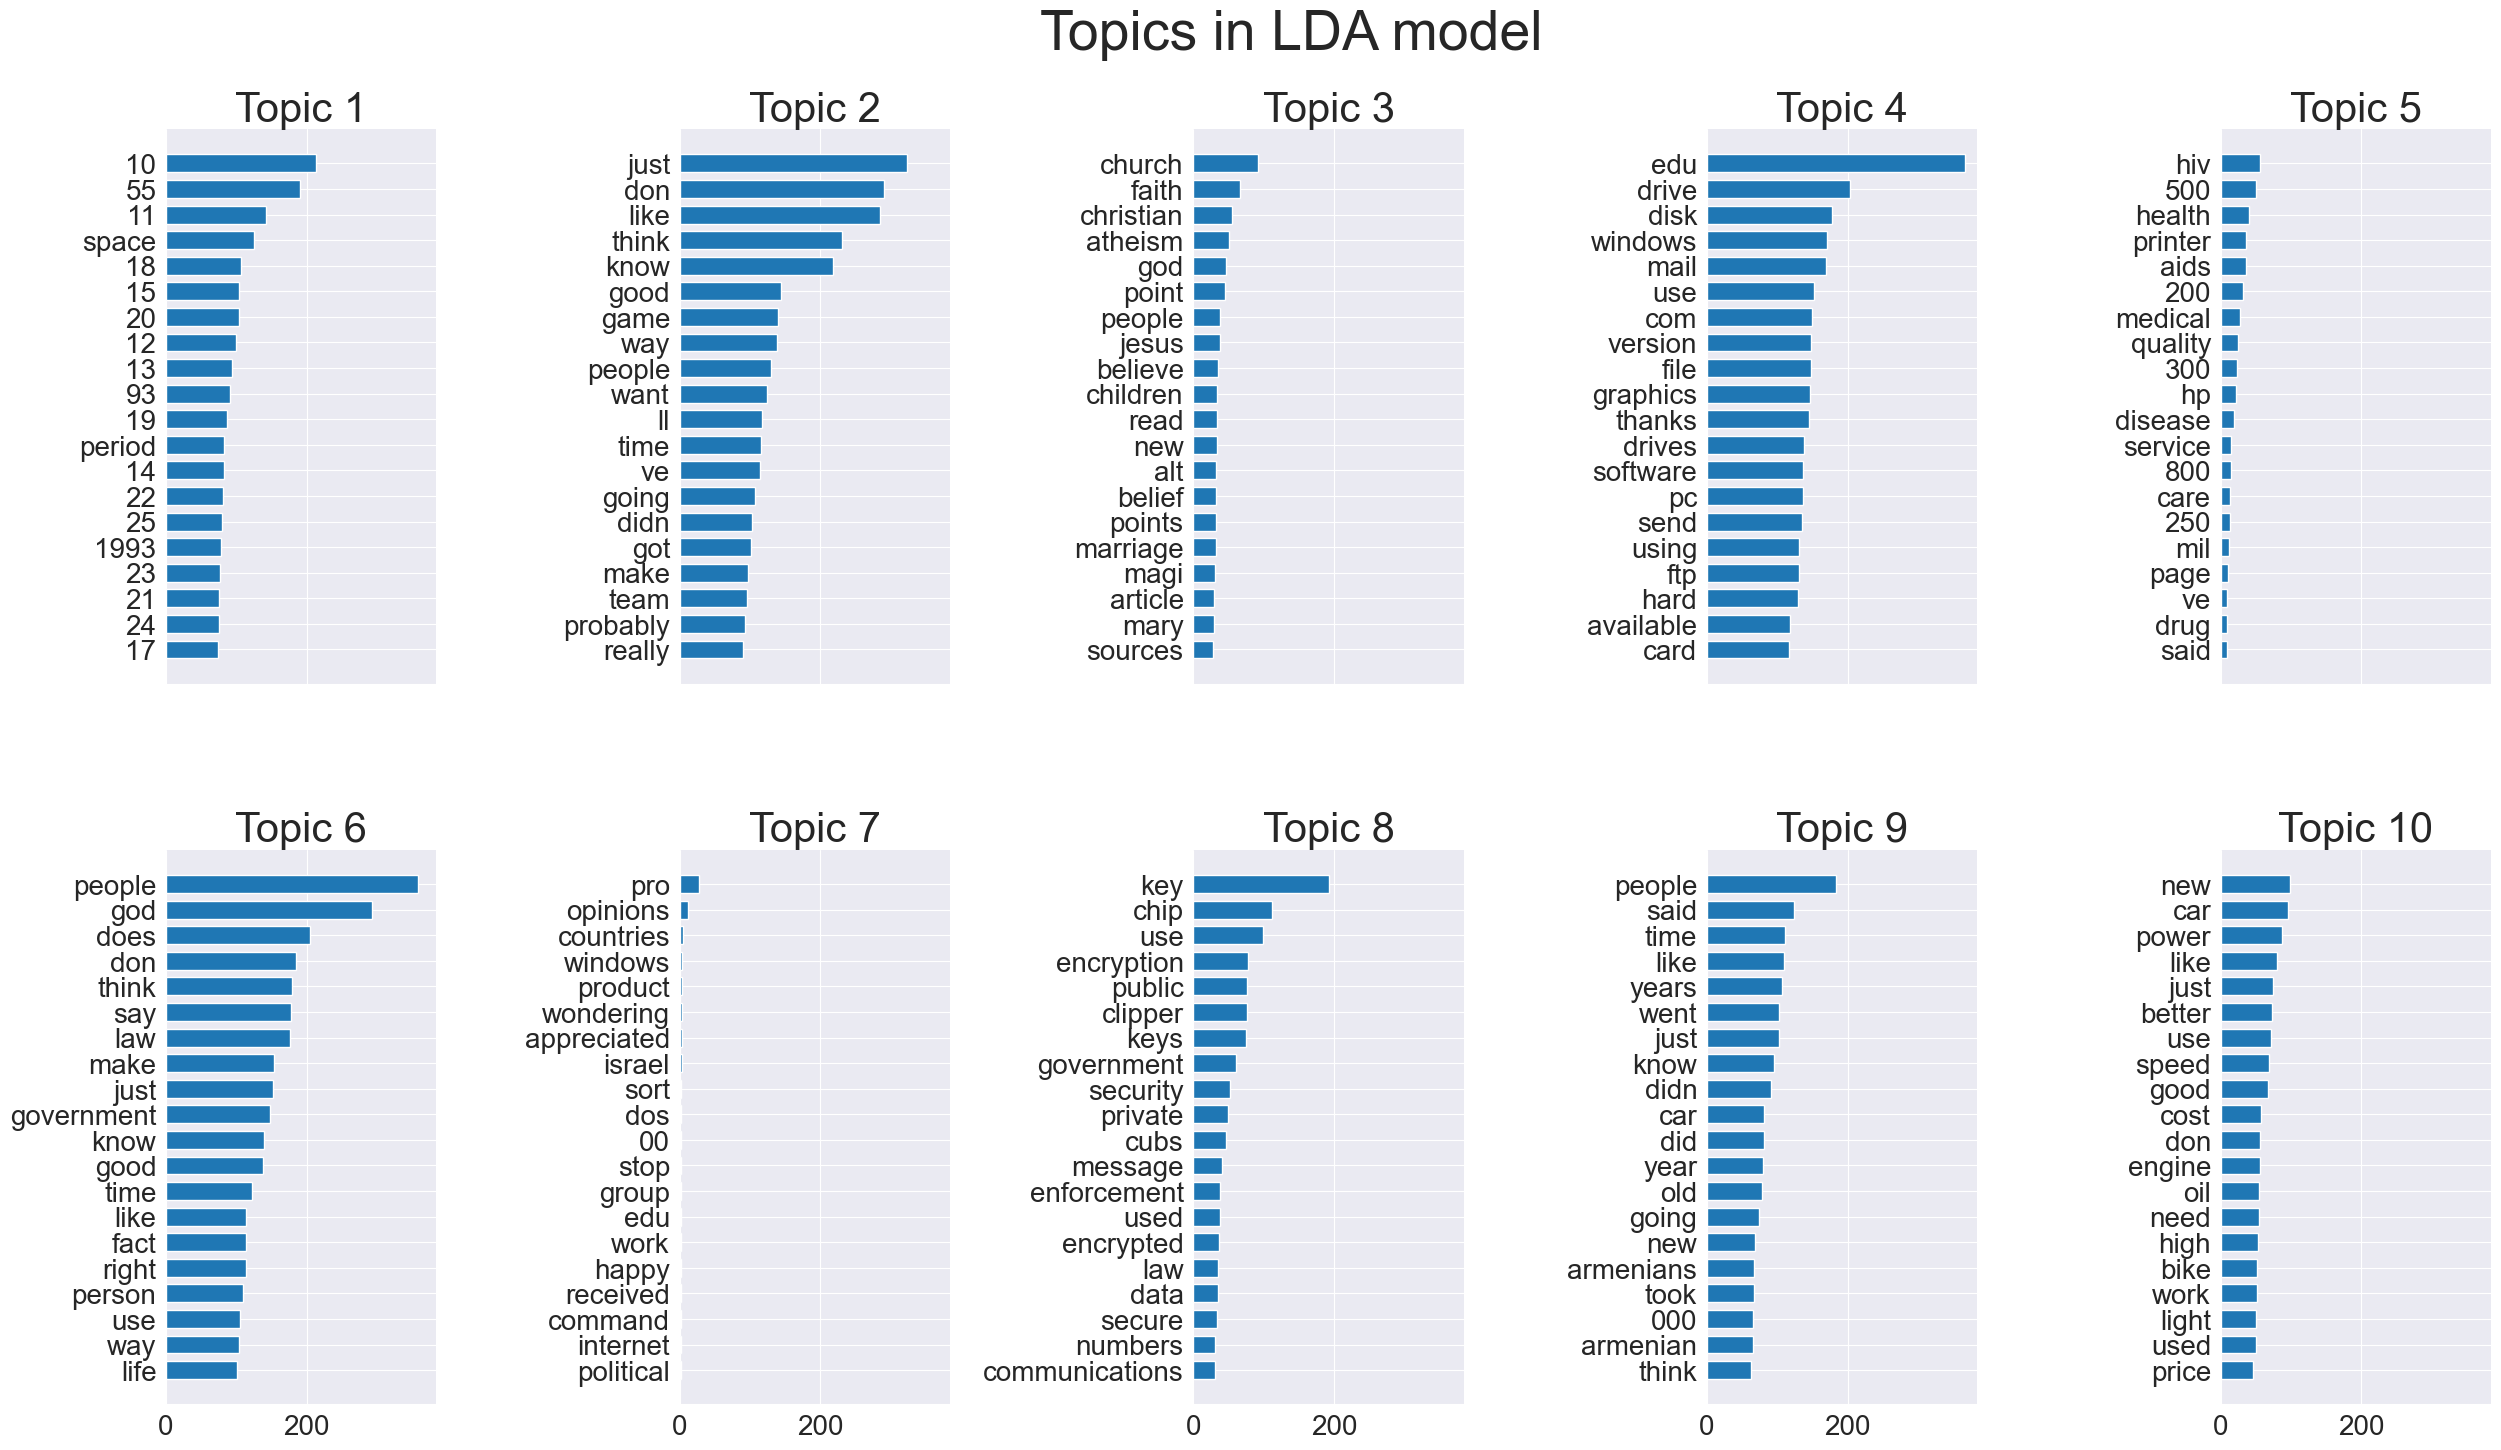

In [56]:
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tf = tf_vectorizer.fit_transform(data_samples)

lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [57]:
out = lda.transform(tf)

In [58]:
out[1]

array([0.00333344, 0.63492594, 0.33840436, 0.00333403, 0.00333334,
       0.00333398, 0.00333334, 0.00333375, 0.00333384, 0.003334  ])

# What is next?

* Revisitaremos no curso outras formas de representação textual: `w2vec` e `BERT`. Mas precisamos ver alguns conceitos importantes antes.
* Tudo o que discutimos hoje funciona "bem" para inglês. Processamento de linguagem natural para outras linguas (e.g., português) ainda é um tema desafiador.